In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np


In [2]:
import os

def get_img():
  root = os.getcwd()
  dataset=root+"//"+"dataset"
  files=[]

  for x in os.listdir(dataset):
    if os.path.isfile("dataset"+"//"+x):
      files.append("dataset"+"//"+x)
    
  return files

In [3]:
from numpy.lib.polynomial import poly1d
def reg(signal,degree):
  x=np.arange(len(signal))
  model=np.poly1d(np.polyfit(x,signal,degree))
  return model(x)

In [4]:
def remove_slop(signal,reg):
  return signal-(reg-signal.mean())

In [5]:
def find_outliers(sig,up,down):
  std=sig.std()
  up_line=np.full_like(sig, up*std+sig.mean())
  down_line=np.full_like(sig, sig.mean()-down*std)

  return up_line,down_line

In [6]:
import cv2
def remove_outliers(signal,up,down,shape):
  upline , downline = find_outliers(signal,up,down)
  clear_img=signal.copy()
  clear_img[clear_img>upline]=255
  clear_img[clear_img<downline]=255
  g=b= signal.reshape(shape)
  r=clear_img.reshape(shape)
  clear_img=cv2.merge((r,g,b))

  return clear_img

In [7]:
print(get_img())


['dataset//c1r1e5n10.tif', 'dataset//c1r1e4n3.tif', 'dataset//c1r1e1n16.tif', 'dataset//c1r1e3n8.tif', 'dataset//c1r1e1n26.tif', 'dataset//c2r2e1n36.tif', 'dataset//c3r3e1n12.tif', 'dataset//c1r1e2n4.tif', 'dataset//c2r2e3n7.tif', 'dataset//c1r1e5n9.tif', 'dataset//c2r2e1n35.tif', 'dataset//c1r1e4n2.tif']


In [8]:
up=2.5
down=2.5

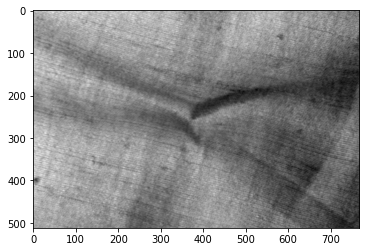

In [9]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[0])
plt.imshow(img,cmap="gray")


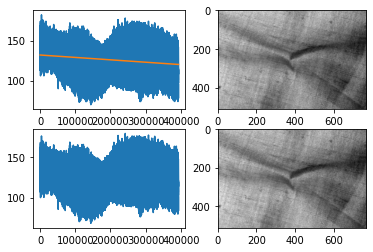

In [10]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

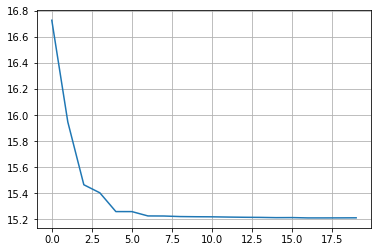

In [11]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

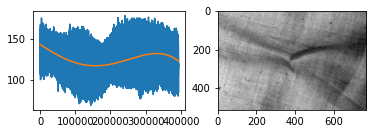

In [12]:
regress= reg(rotated_signal,4)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

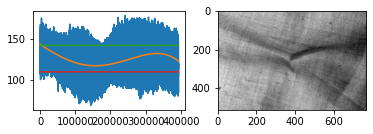

In [13]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

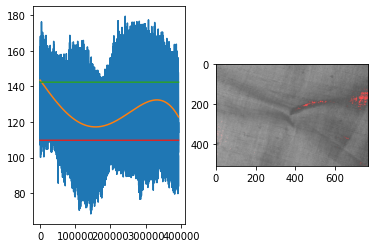

In [14]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up,down,img.shape).astype('uint8'),cmap="gray")

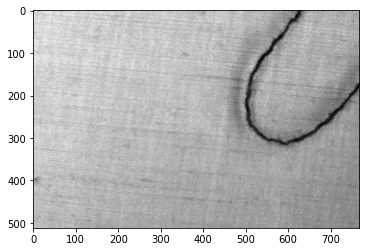

In [15]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[1])
plt.imshow(img,cmap="gray")


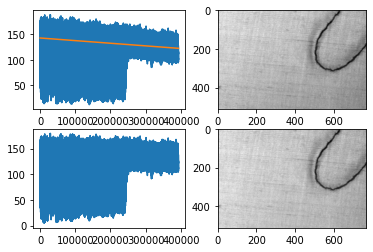

In [16]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

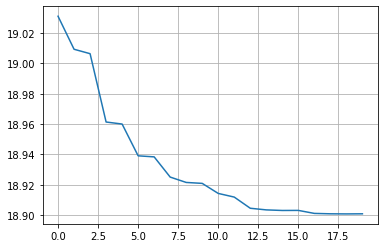

In [17]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

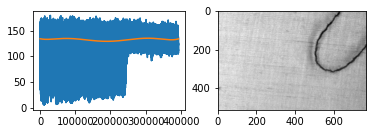

In [18]:
regress= reg(rotated_signal,6)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

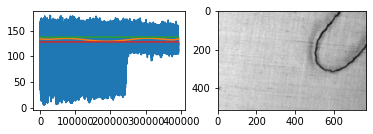

In [19]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

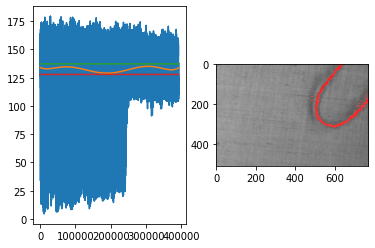

In [20]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up,down,img.shape).astype('uint8'),cmap="gray")

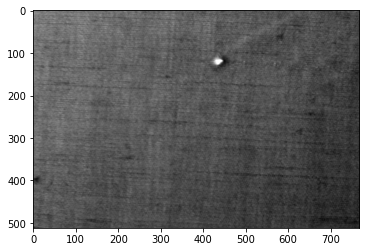

In [21]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[2])
plt.imshow(img,cmap="gray")


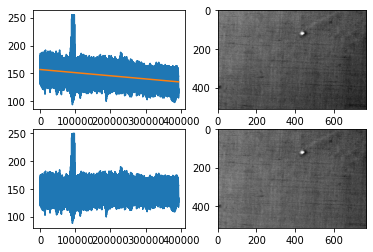

In [22]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

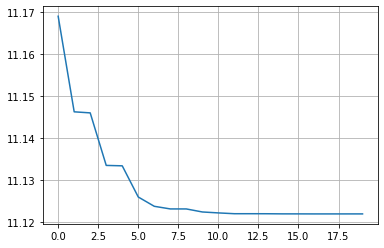

In [23]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

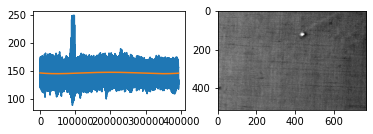

In [24]:
regress= reg(rotated_signal,4)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

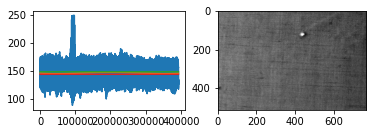

In [25]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

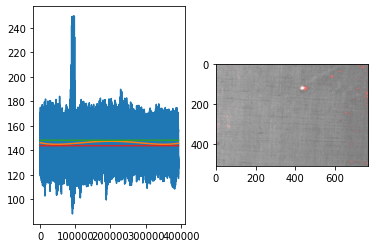

In [26]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up,down,img.shape).astype('uint8'),cmap="gray")

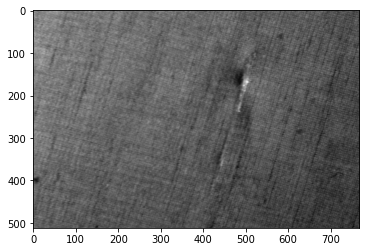

In [27]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[3])
plt.imshow(img,cmap="gray")


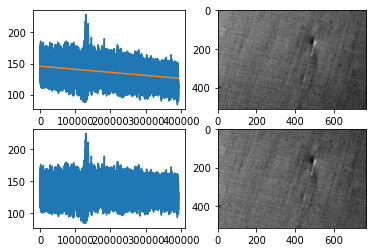

In [28]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

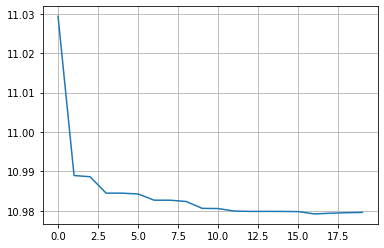

In [29]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

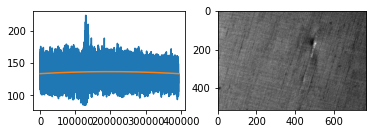

In [30]:
regress= reg(rotated_signal,2)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

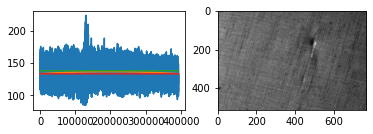

In [31]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

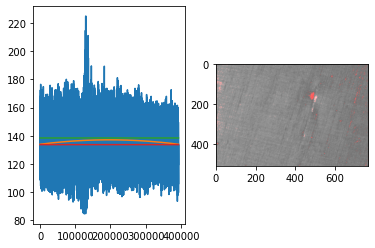

In [32]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up,down,img.shape).astype('uint8'),cmap="gray")

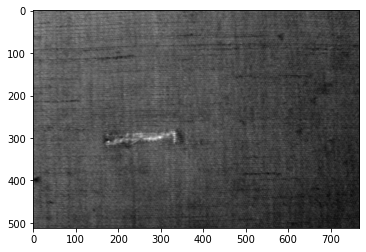

In [33]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[4])
plt.imshow(img,cmap="gray")


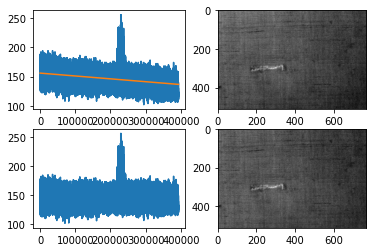

In [34]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

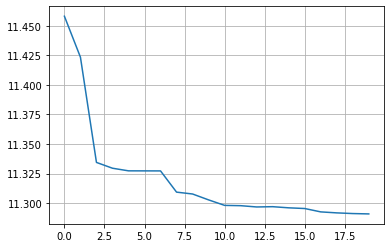

In [35]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

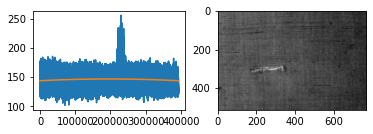

In [36]:
regress= reg(rotated_signal,2)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

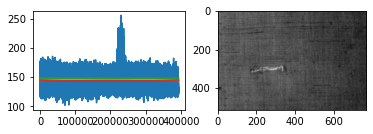

In [37]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

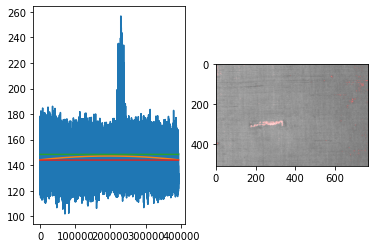

In [38]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up,down,img.shape).astype('uint8'),cmap="gray")

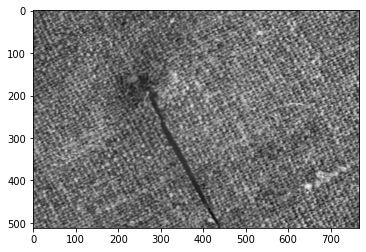

In [91]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[5])
plt.imshow(img,cmap="gray")


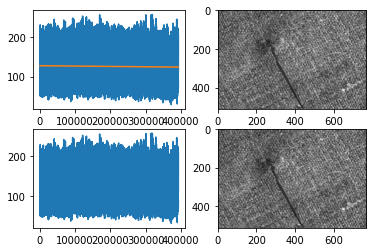

In [92]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

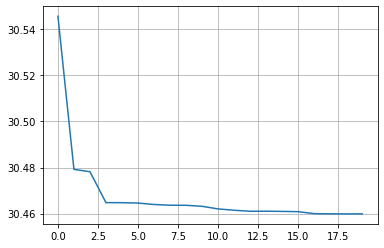

In [93]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

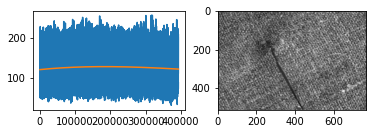

In [94]:
regress= reg(rotated_signal,3)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

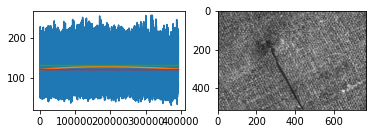

In [95]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

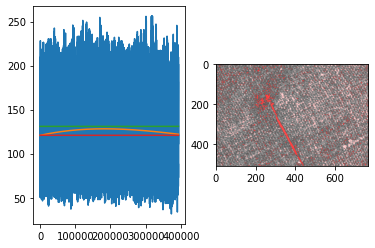

In [98]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up=1.5,down=1.5,img.shape).astype('uint8'),cmap="gray")

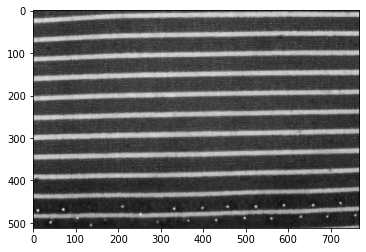

In [99]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[6])
plt.imshow(img,cmap="gray")


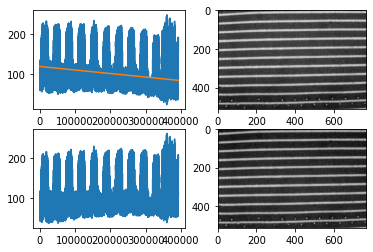

In [100]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

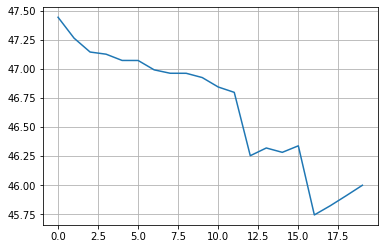

In [101]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


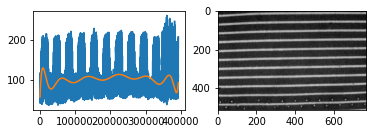

In [102]:
regress= reg(rotated_signal,16)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

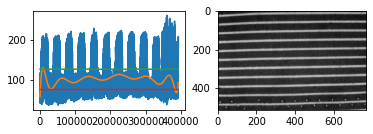

In [103]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

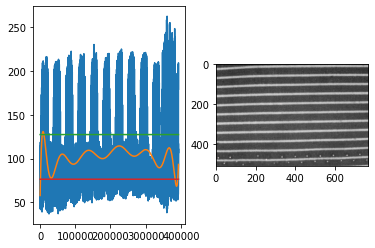

In [113]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up,down,img.shape).astype('uint8'),cmap="gray")

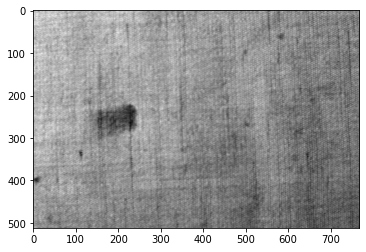

In [51]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[7])
plt.imshow(img,cmap="gray")


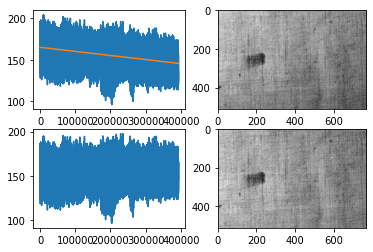

In [52]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

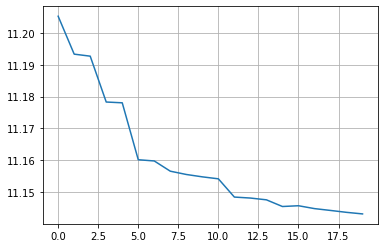

In [53]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


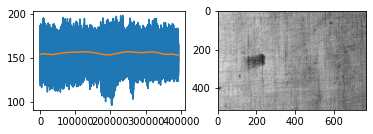

In [54]:
regress= reg(rotated_signal,16)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

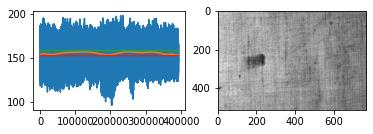

In [55]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

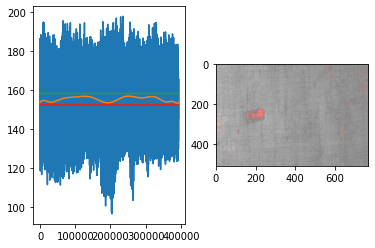

In [56]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up,down,img.shape).astype('uint8'),cmap="gray")

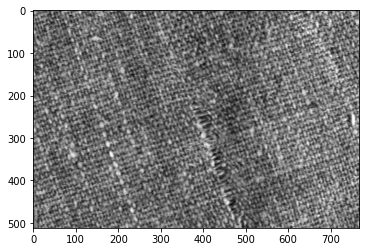

In [115]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[8])
plt.imshow(img,cmap="gray")


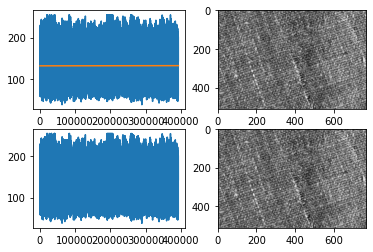

In [116]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

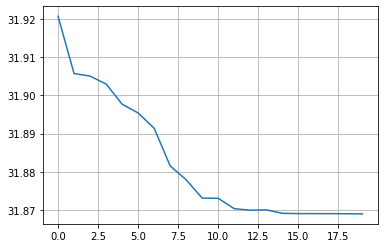

In [117]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

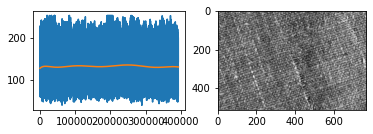

In [118]:
regress= reg(rotated_signal,9)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

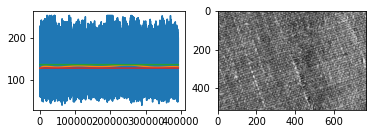

In [119]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

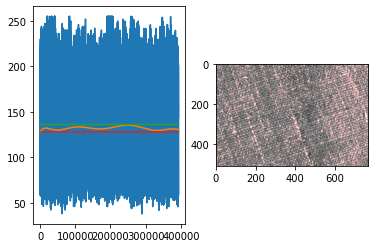

In [125]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,1,5,img.shape).astype('uint8'),cmap="gray")

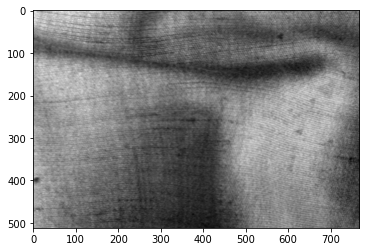

In [126]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[9])
plt.imshow(img,cmap="gray")


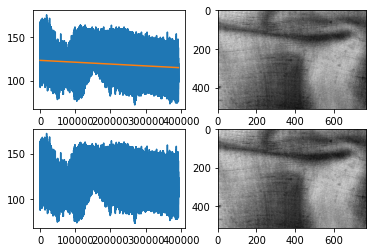

In [127]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

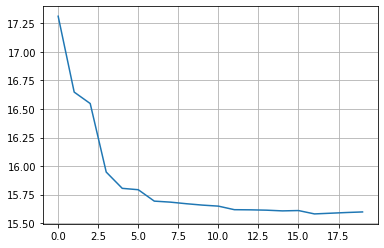

In [65]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

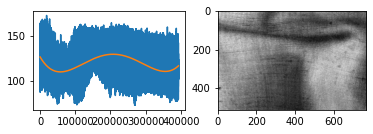

In [128]:
regress= reg(rotated_signal,4)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

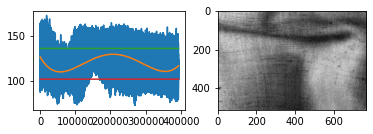

In [129]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

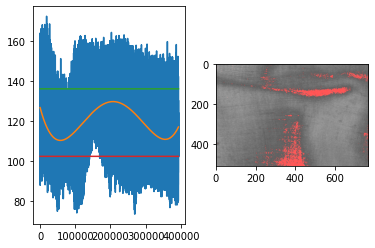

In [135]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up,1.5,img.shape).astype('uint8'),cmap="gray")

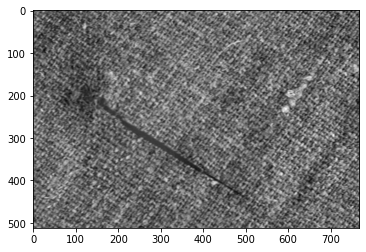

In [136]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[10])
plt.imshow(img,cmap="gray")


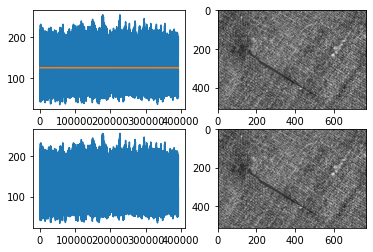

In [137]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

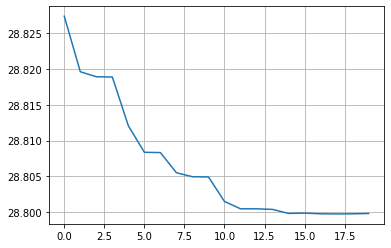

In [71]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

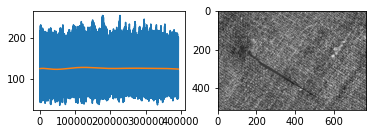

In [138]:
regress= reg(rotated_signal,10)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

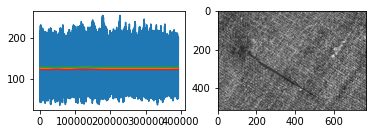

In [139]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

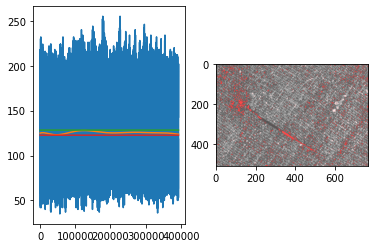

In [145]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up,1.5,img.shape).astype('uint8'),cmap="gray")

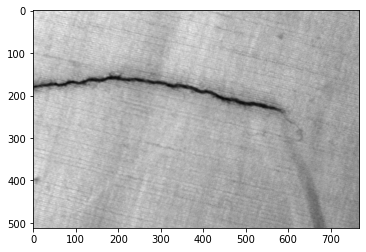

In [75]:
from matplotlib import pyplot as plt

img=plt.imread(get_img()[11])
plt.imshow(img,cmap="gray")


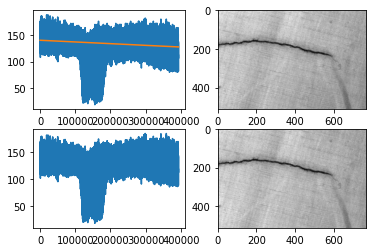

In [76]:
signal=np.ravel(img)

reg1= reg(signal,1)
rotated_signal=remove_slop(signal,reg1)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(signal)
plt.plot(reg1)

plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,3)
plt.plot(rotated_signal)
# plt.plot(signal)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

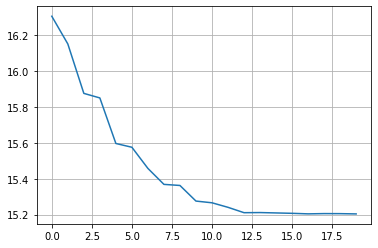

In [77]:
rmse_list=[]
X=np.arange(len(rotated_signal))
for i in range(1,21):
  poly=np.polyfit(X,rotated_signal,i)
  model=np.poly1d(poly)
  rmse_list.append(np.sqrt(np.mean(np.square(rotated_signal-model(X)))))
plt.plot(rmse_list)
plt.grid()

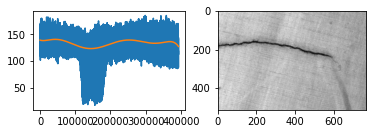

In [78]:
regress= reg(rotated_signal,7)
pic= rotated_signal.reshape(img.shape)

plt.subplot(2,2,1)
plt.plot(rotated_signal)
plt.plot(regress)

plt.subplot(2,2,2)
plt.imshow(pic,cmap="gray")

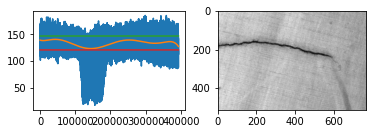

In [79]:
up_line,down_line=find_outliers(regress,up,down)
plt.subplot(2,2,3)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(2,2,4)
plt.imshow(pic,cmap="gray")

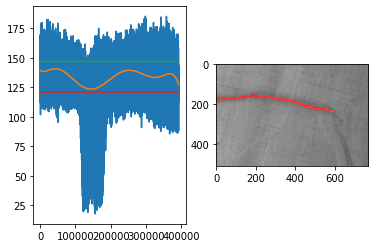

In [80]:
plt.subplot(1,2,1)
plt.plot(rotated_signal)
plt.plot(regress)
plt.plot(up_line)
plt.plot(down_line)

plt.subplot(1,2,2)
plt.imshow(remove_outliers(rotated_signal,up,down,img.shape).astype('uint8'),cmap="gray")